In [1]:
'''
The objective of this code is to convert a tif image to a cut segment 

'''

'\nThe objective of this code is to convert a tif image to a cut segment \n\n'

In [61]:
import rasterio
import rasterio.plot
import rasterio.features
import rasterio.warp
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import pprint

In [62]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [65]:
filepath = '/content/gdrive/Shared drives/2020_FDLUSA_Earth Science_Knowledge Discovery Framework/Code/Datasets/modis/modis_2017_sep.tif'

In [66]:
# Open the dataset using rasterio
dataset = rasterio.open(filepath)

# Find the number of bands in the image
num_bands = dataset.indexes

# We have a total of three bands (indix starts at 1)
band_red = dataset.read(1) # Band 1
band_green = dataset.read(2) # Band 4
band_blue = dataset.read(3) # Band 3


In [9]:
# Plot the dataset
fig = plt.figure(figsize=(100,100))
rasterio.plot.show(dataset)

Output hidden; open in https://colab.research.google.com to view.

In [32]:
rasterio.windows.Window?

In [31]:
np.shape(band_red)

(1826, 13814)

In [35]:
np.round(np.shape(band_red)[0]/2)

913.0

In [36]:
np.round(np.shape(band_red)[1]/2)

6907.0

Text(0, 0.5, 'Row #')

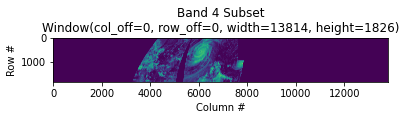

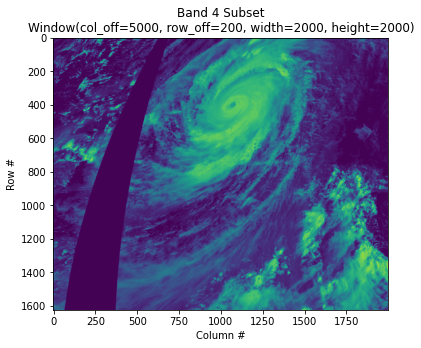

In [52]:
# window = rasterio.windows.Window(np.round(np.shape(band_red)[1]/2), np.round(np.shape(band_red)[0]/2), 5000, 5000)
# Whole window
window = rasterio.windows.Window(0,0, np.shape(band_red)[1], np.shape(band_red)[0])

window2 = rasterio.windows.Window(5000,200, 2000, 2000)


# window = rasterio.windows.Window(1024, 1024, 1280, 2560)


with rasterio.open(filepath) as src:
    subset = src.read(1, window=window)

with rasterio.open(filepath) as src:
    subset2 = src.read(1, window=window2)

plt.figure(figsize=(6,8.5))
plt.imshow(subset)
# plt.colorbar(shrink=0.5)
plt.title(f'Band 4 Subset\n{window}')
plt.xlabel('Column #')
plt.ylabel('Row #')

plt.figure(figsize=(6,8.5))
plt.imshow(subset2)
# plt.colorbar(shrink=0.5)
plt.title(f'Band 4 Subset\n{window2}')
plt.xlabel('Column #')
plt.ylabel('Row #')

Text(0, 0.5, 'Row #')

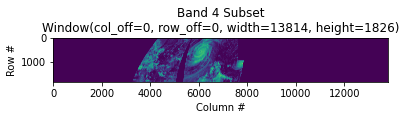

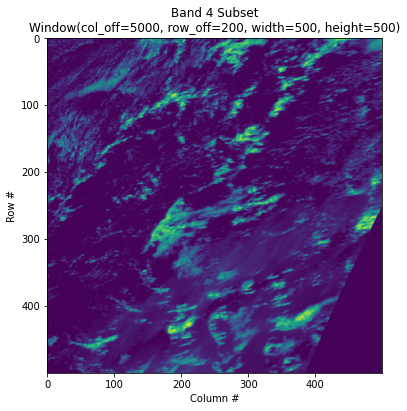

In [53]:
# window = rasterio.windows.Window(np.round(np.shape(band_red)[1]/2), np.round(np.shape(band_red)[0]/2), 5000, 5000)
# Whole window
window = rasterio.windows.Window(0,0, np.shape(band_red)[1], np.shape(band_red)[0])

window2 = rasterio.windows.Window(5000,200, 500, 500)


# window = rasterio.windows.Window(1024, 1024, 1280, 2560)


with rasterio.open(filepath) as src:
    subset = src.read(1, window=window)

with rasterio.open(filepath) as src:
    subset2 = src.read(1, window=window2)

plt.figure(figsize=(6,8.5))
plt.imshow(subset)
# plt.colorbar(shrink=0.5)
plt.title(f'Band 4 Subset\n{window}')
plt.xlabel('Column #')
plt.ylabel('Row #')

plt.figure(figsize=(6,8.5))
plt.imshow(subset2)
# plt.colorbar(shrink=0.5)
plt.title(f'Band 4 Subset\n{window2}')
plt.xlabel('Column #')
plt.ylabel('Row #')

In [82]:
def split_image(rasterio_open_file, tl_corner_column, tl_corner_row, pixel_cut_length, output_directory):
  '''
  This function takes the rasterio open file and cuts it into a numpy array of 
  a particular size. 

  @param input_file : [rasterio file] rastered imaged
  @param tl_corner_column : [int] column number of the top left corner that will be cut
  @param tl_corner_row : [int] row number of the top left corner that will be cut
  @param pixel_cut_length : [int] length of the cut in pixels. Note that in this
  code we will use the same length/width cut, but this can be changed. 
  @output_directory : [str] output directory for numpy array and images

  output:
  @cut_array : [np array] Numpy array containing RGB values for the cut segment
  @cut_array_img : [figure] Figure corresponding to cut array for sanity check

  '''
  # Find window parameters
  window = rasterio.windows.Window(tl_corner_column, tl_corner_row, pixel_cut_length, pixel_cut_length)

  # Open the file 
  subset = rasterio_open_file.read(1, window=window)

  # Create a filename based on the window
  filename = f'subset_{tl_corner_column}_{tl_corner_row}_{pixel_cut_length}'

  # Save the numpy array for the subset
  np.save(f'{output_directory}np_arrays/{filename}.npy', subset, allow_pickle=True)

  # Save a figure (for troubleshooting)
  fig1 = plt.figure(figsize=(6,8.5))
  plt.imshow(subset)
  plt.title(f'Band 4 Subset\n{window}')
  plt.xlabel('Column #')
  plt.ylabel('Row #')
  plt.savefig(f'{output_directory}images/{filename}.png')
  plt.close(fig1)
  print(f'Saved file {filename}...')




output_dir =  '/content/gdrive/Shared drives/2020_FDLUSA_Earth Science_Knowledge Discovery Framework/Code/Datasets/training_set_tmp/'
src = rasterio.open(filepath)
# Test single image
# split_image(src, 5000, 200, 500, output_dir)







In [83]:
src = rasterio.open(filepath)
band_1 = src.read(1)
np.shape(band_1)

subset_size = 500 # pixels
corner_values = []

column_values = np.arange(0, np.shape(band_1)[1], subset_size)
row_values = np.arange(0, np.shape(band_1)[0], subset_size)

for column_val in column_values:
  for row_val in row_values:
    split_image(src, column_val, row_val, subset_size, output_dir)



Saved file subset_0_0_500...
Saved file subset_0_500_500...
Saved file subset_0_1000_500...
Saved file subset_0_1500_500...
Saved file subset_500_0_500...
Saved file subset_500_500_500...
Saved file subset_500_1000_500...
Saved file subset_500_1500_500...
Saved file subset_1000_0_500...
Saved file subset_1000_500_500...
Saved file subset_1000_1000_500...
Saved file subset_1000_1500_500...
Saved file subset_1500_0_500...
Saved file subset_1500_500_500...
Saved file subset_1500_1000_500...
Saved file subset_1500_1500_500...
Saved file subset_2000_0_500...
Saved file subset_2000_500_500...
Saved file subset_2000_1000_500...
Saved file subset_2000_1500_500...
Saved file subset_2500_0_500...
Saved file subset_2500_500_500...
Saved file subset_2500_1000_500...
Saved file subset_2500_1500_500...
Saved file subset_3000_0_500...
Saved file subset_3000_500_500...
Saved file subset_3000_1000_500...
Saved file subset_3000_1500_500...
Saved file subset_3500_0_500...
Saved file subset_3500_500_500..